# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "bulldozer"
filename = monster + "_20200928.csv"

max_skills = [7, 5, 5]

df = pd.read_csv(filename)
df_full = pd.read_csv(filename)
df_full = df_full[df_full["Stars"] == 6]
print(df.columns)
runes_cols = ["Slot" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Eff"], ascending=False, inplace=True)
df.drop(['Artifact Element', 'Artifact Element Substats', 'Artifact Type', 'Artifact Type Substats'], axis=1, inplace=True) # temporary
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc',
       'CRate', 'CDmg', 'Eff', 'Eff.HP', 'Sets', 'Skillups', 'Acquired',
       'Slot1', 'Slot2', 'Slot3', 'Slot4', 'Slot5', 'Slot6',
       'Artifact Element', 'Artifact Element Substats', 'Artifact Type',
       'Artifact Type Substats'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,...,Eff.HP,Sets,Skillups,Acquired,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6
1,40,6,21724,894,2119,114,15,10,102,194,...,185881,Guard + Shield + Will,"[7, 5, 5]",2018-08-03,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
2,40,6,18490,888,2130,164,15,13,97,168,...,158922,Guard + Will,"[6, 5, 5]",2017-11-16,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
3,40,6,17925,962,2274,118,30,7,84,220,...,163100,Blade + Guard + Will,"[7, 5, 5]",2016-06-20,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
4,40,6,15910,737,2192,118,24,15,100,261,...,140198,Rage + Will,"[7, 5, 5]",2017-06-05,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
5,40,6,20146,788,2328,98,21,16,80,252,...,187116,Guard + Rage,"[7, 5, 5]",2019-02-15,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,35,5,14511,461,962,111,23,21,48,74,...,65401,Energy + Fight + Revenge,"[7, 5, 5]",2017-07-22,ATK+,HP%,DEF+,DEF%,HP+,DEF%
615,35,5,10976,516,1145,112,22,23,40,59,...,56498,Guard + Guard + Guard,"[7, 5, 5]",2018-06-25,ATK+,DEF%,DEF+,DEF%,HP+,HP%
616,35,5,17809,526,766,103,26,14,37,54,...,68048,Energy + Guard + Will,"[5, 5, 5]",2020-04-04,ATK+,DEF%,DEF+,HP%,HP+,HP%
619,27,4,6802,336,404,103,25,7,46,58,...,17372,Nemesis,"[1, 1, 1]",2020-04-16,ATK+,DEF%,DEF+,HP%,HP+,ATK+


# Stars Distribution, picking 6*

(537, 21)


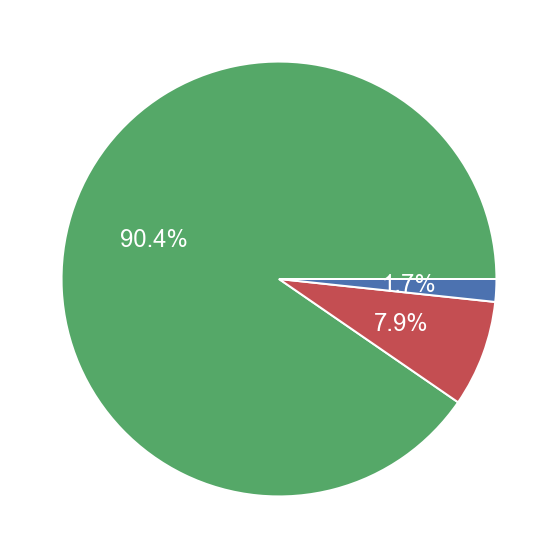

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Runes 

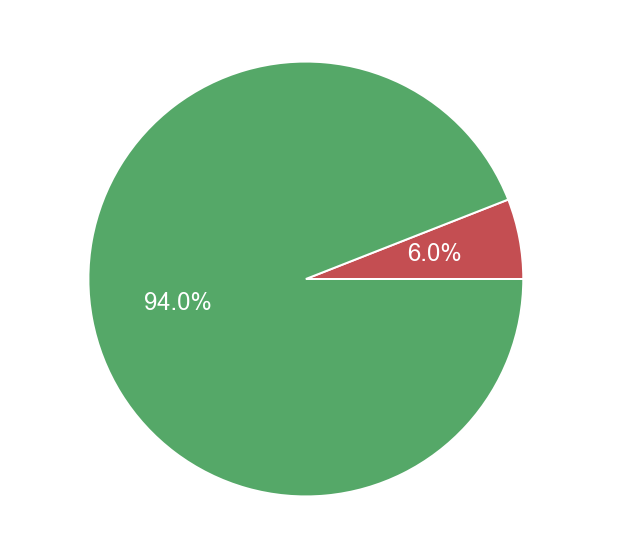

In [3]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without\nRunes': df_full.shape[0] - df_stars6.shape[0],
    'With\nRunes': df_stars6.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Skilled Up

{'All': 490, '2nd & 3rd': 7, '1st & 3rd': 6, 'None': 23}


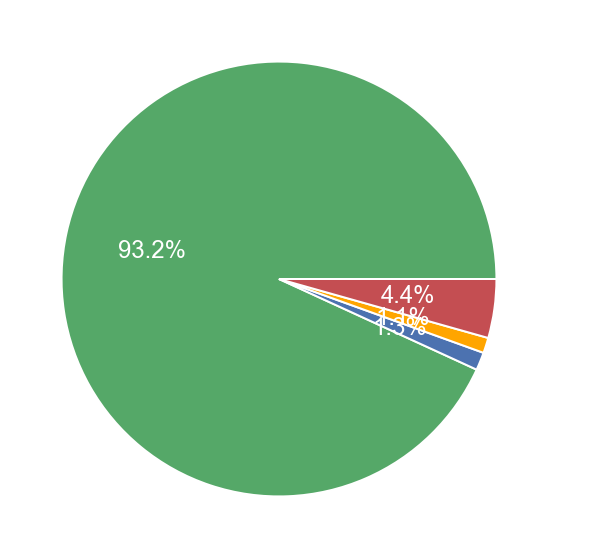

In [24]:
skills_count = {}

for value, count in df_stars6['Skillups'].value_counts().items():
    skillups = eval(value)
    if skillups == max_skills:
        skills_count['All'] = count
    elif skillups[:2] == max_skills[:2] and count > 5:
        skills_count['1st & 2nd'] = count
    elif [skillups[0], skillups[2]] == [max_skills[0], max_skills[2]] and count > 5:
        skills_count['1st & 3rd'] = count
    elif skillups[1:] == max_skills[1:] and count > 5:
        skills_count['2nd & 3rd'] = count
    elif skillups[0] == max_skills[0] and count > 5:
        skills_count['Only 1st'] = count
    elif skillups[1] == max_skills[1] and count > 5:
        skills_count['Only 2nd'] = count
    elif skillups[2] == max_skills[2] and count > 5:
        skills_count['Only 3rd'] = count
    else:
        if 'None' not in skills_count.keys():
            skills_count['None'] = 0
        skills_count['None'] += count

print(skills_count)
fig = plt.figure(figsize=(10, 10))
plt.pie(list(skills_count.values()), labels=skills_count.keys(), autopct='%1.1f%%', colors=['g', 'b', 'orange', 'r'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

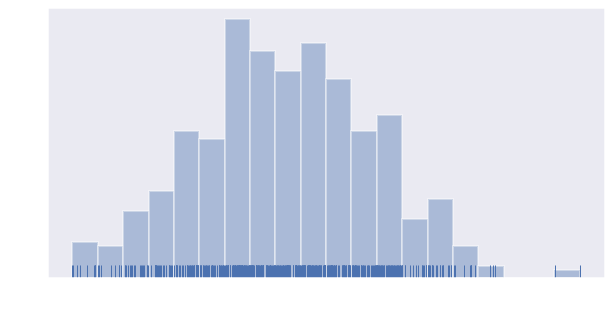

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff.HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# HP Distribution

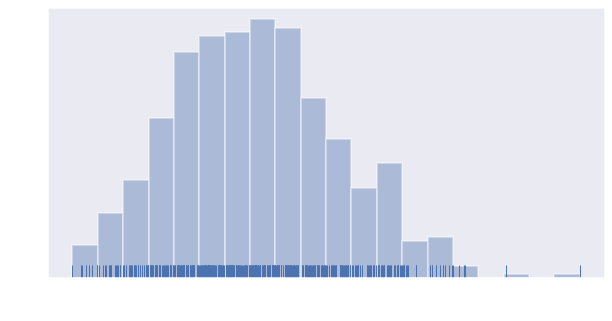

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_hp.png", transparent=True, bbox_inches = "tight")

# Attack Distribution

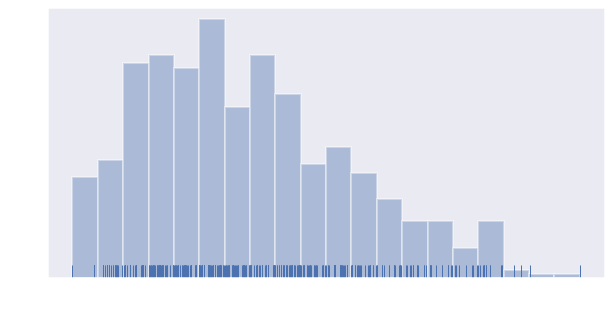

In [7]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Critical Rate Distribution

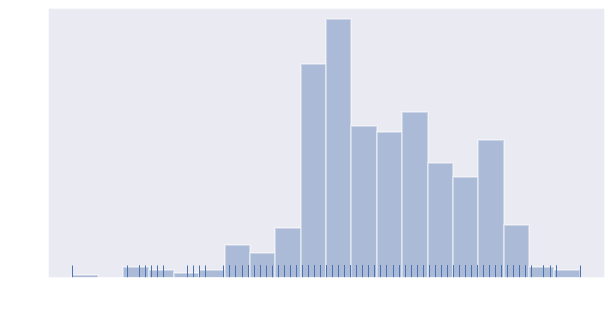

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CRate"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critrate.png", transparent=True, bbox_inches = "tight")

# Critical Damag Distribution

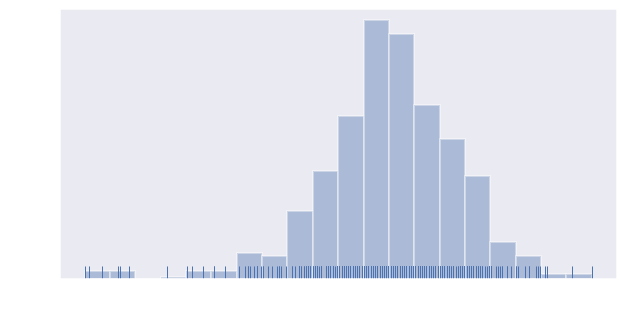

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CDmg"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critdmg.png", transparent=True, bbox_inches = "tight")

# Defense Distribution

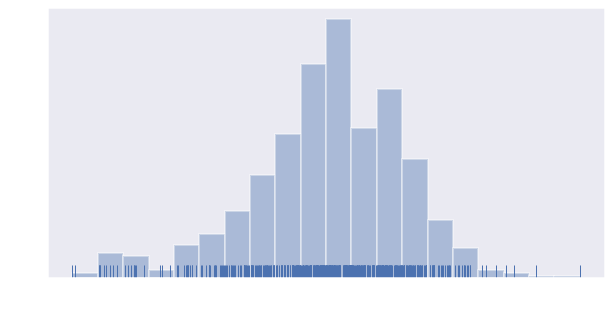

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Defense"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_defense.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

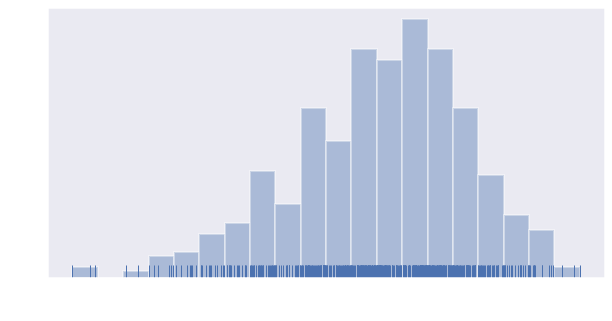

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Accuracy Distribution

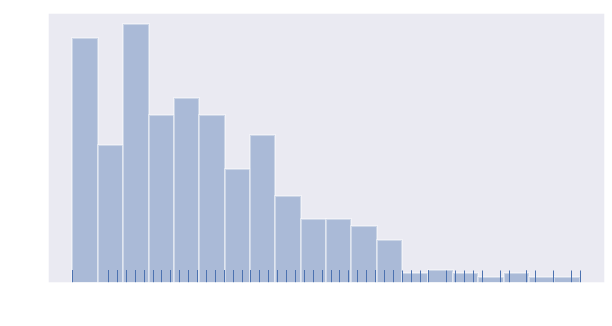

In [12]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Acc"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_acc.png", transparent=True, bbox_inches = "tight")

# Resistance Distribution

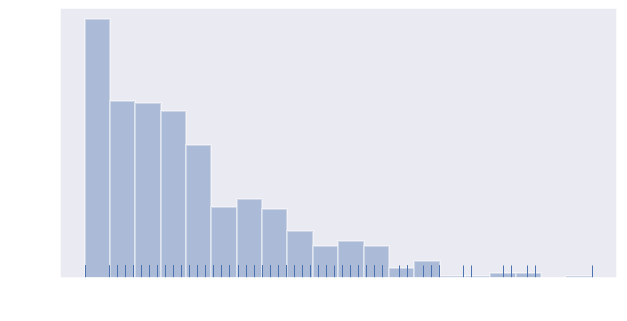

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Res"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_res.png", transparent=True, bbox_inches = "tight")

# Sets

Rage + Will                     123
Guard + Will                     69
Blade + Guard + Will             43
Guard + Guard + Will             39
Will                             39
Blade + Will                     22
Rage                             18
Blade + Rage                     13
Guard + Rage                     10
Guard + Revenge + Will            8
Guard + Shield + Will             8
Violent + Will                    8
Energy + Guard + Will             7
Shield + Will                     7
Blade + Guard + Guard             7
Guard + Guard                     6
Blade + Guard                     5
Revenge + Will                    5
Blade + Blade + Guard             4
Determination + Guard + Will      4
Guard                             4
Focus + Rage                      4
Name: Sets, dtype: int64


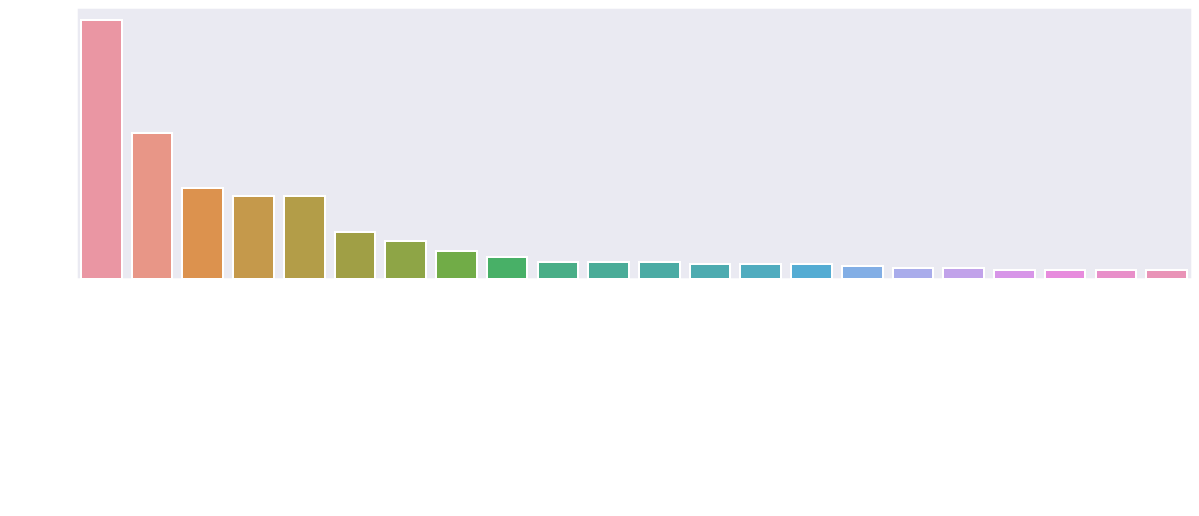

In [14]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 3]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# 4-Rune Sets

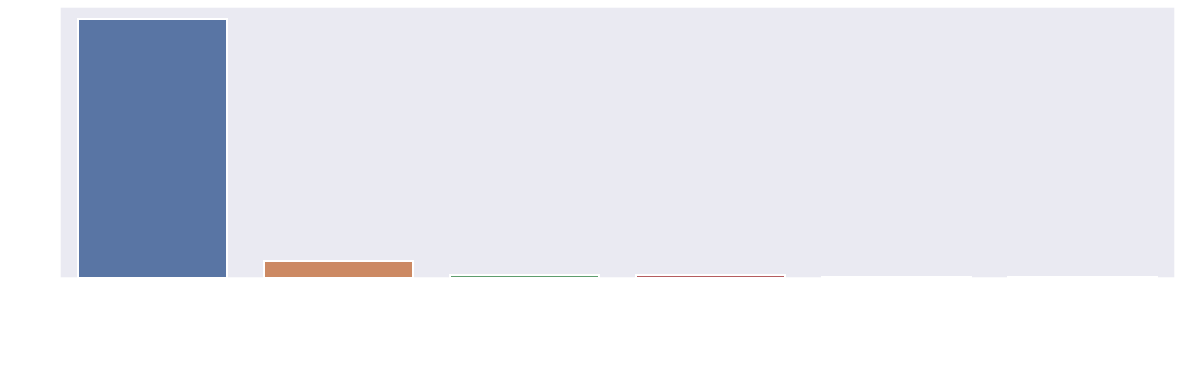

In [15]:
sets_4 = ['Violent', 'Swift', 'Rage', 'Fatal', 'Despair', 'Vampire']
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
set_sum = dict()
for set_4 in sets_4:
    indexes = [val for val in counts.index if set_4 in val]
    set_count = counts.loc[indexes]
    set_sum[set_4] = set_count.sum()
set_sum = {k: v for k, v in sorted(set_sum.items(), key=lambda item: item[1], reverse=True)}
x, y = list(set_sum.keys()), list(set_sum.values())
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_4sets.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

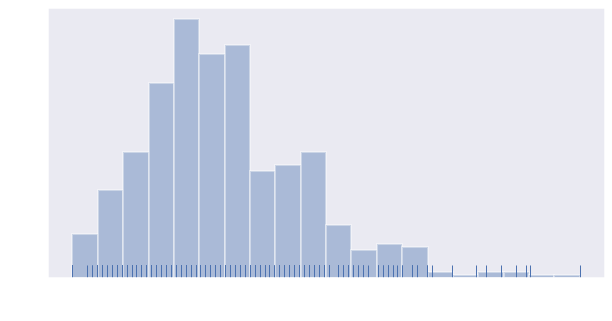

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Average & Best by Category

In [66]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc', 'CRate', 'CDmg', 'Eff', 'Eff.HP']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

display(df_stars6[cols].describe().loc[['mean', 'max']])

,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,Eff,Eff.HP
mean,16641.743017,780.49162,2000.52514,129.197393,27.888268,14.690875,81.054004,191.068901,87.719069,135680.914339
max,25061.000000,1072.00000,2601.00000,201.000000,78.000000,57.000000,114.000000,282.000000,105.400000,207943.000000


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Slot1', 'Slot3', 'Slot5', 'Level', 'Stars', 'Skillups'], axis=1).reset_index(drop=True).sort_values(['Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>CRate</th>
      <th>CDmg</th>
      <th>Eff</th>
      <th>Eff.HP</th>
      <th>Sets</th>
      <th>Slot2</th>
      <th>Slot4</th>
      <th>Slot6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>21724</td>
      <td>894</td>
      <td>2119</td>
      <td>114</td>
      <td>15</td>
      <td>10</td>
      <td>102</td>
      <td>194</td>
      <td>105.40</td>
      <td>185881</td>
      <td>Guard + Shield + Will</td>
      <td>DEF%</td>
      <td>CDmg%</td>
      <td>DEF%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>18490</td>
      <td>888</td>
      <td>2130</td>
      <td>164</td>
      <td>15</td>
      <td>13</td>
      <td>97</td>
      <td>168</td>
      <td>104.91</td>
      <td>158922</td>
      <td>Guard + Will</td>
  

# Most common Builds

{'build': ['DEF%/CDmg%/DEF%', 'DEF%/DEF%/DEF%'], 'count': [520, 10]}


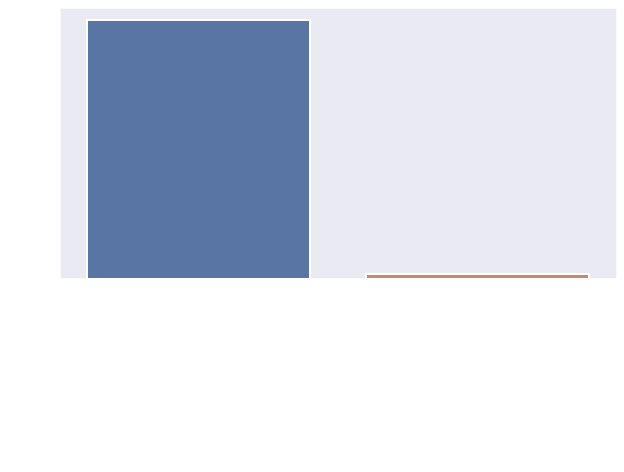

In [19]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Slot2", "Slot4", "Slot6"]).size().reset_index(name='Count')
builds_count = builds_count.sort_values(["Count"], ascending=False) # single builds to drop

builds_count_proper = dict()
for row in builds_count.values.tolist():
    set_temp = row[:3]
    set_temp.sort()
    set_temp_txt = '/'.join(set_temp)
    if set_temp_txt not in builds_count_proper:
        builds_count_proper[set_temp_txt] = {
            'build': '/'.join(row[:3]),
            'count': 0,
        }
    builds_count_proper[set_temp_txt]['count'] += row[3]

builds_count_final = list()
for b in builds_count_proper.values():
    if b['count'] < 5:
        continue
    builds_count_final.append(b)
    
builds_count = sorted(builds_count_final, key=lambda k: k['count'], reverse=True)
builds_count = {k: [dic[k] for dic in builds_count] for k in builds_count[0]}
print(builds_count)

builds_common = sns.barplot(x=builds_count['build'], y=builds_count['count'])
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

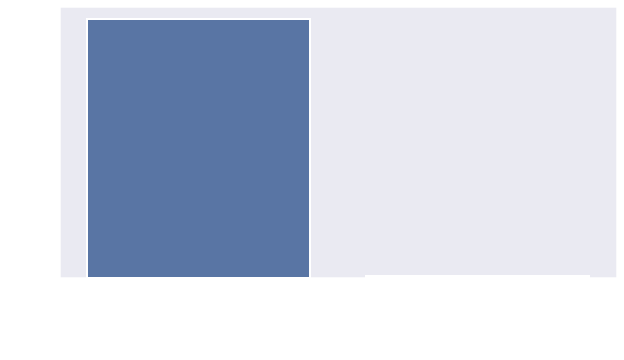

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Slot2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

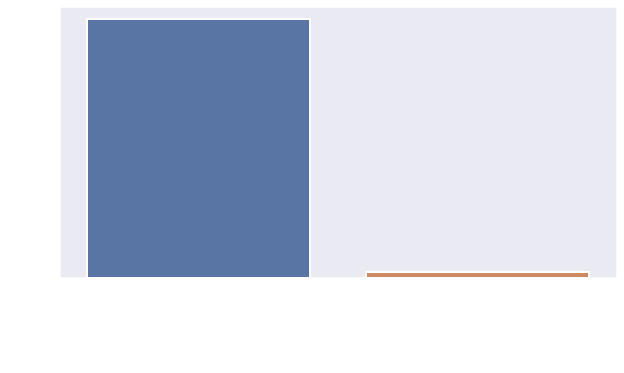

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Slot4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

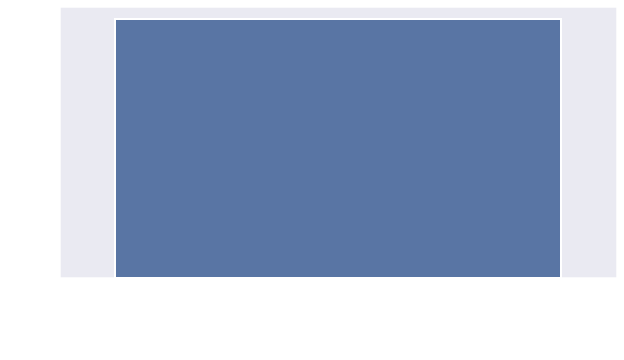

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Slot6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")

# Chosen Skill Damage (Ignore Def)

27378.686105263158
20662.95948564149


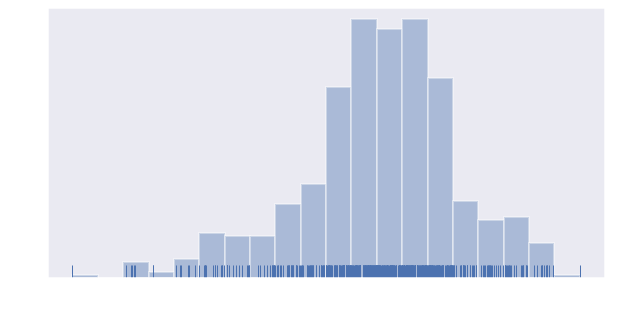

In [64]:
# BULLDOZER:
#     IGNORE DEF
#     21% DEF LEADER SKILL
#     GUILD BATTLE
#     MAX DEFENSE & CRIT DMG TOWER
#     MAX DEFENSE & CRIT DMG FLAG
#     SKILLUP BONUS BASED ON ACTUAL SKILLUPS
#     DEFENSE BUFF
#     100% CRIT RATE
def calc_ignore_defense_dmg(stat, skillups, crit_dmg):
    crit_dmg = crit_dmg / 100
    skillups_bonus = [0, .05, .15, .25, .25] # different for every monster
    skillups = eval(skillups)
    skillup_bonus = skillups_bonus[skillups[2] - 1] # different for every monster, 2 -> skill #3
    dmg_reduction = 1000 / 1140
    
    leader_skill = .21 # different for every monster
    base_stat = 615 # different for every monster
    buff = .7 # different for every buff
    
    total_stat = (stat + leader_skill * base_stat) * (buff + 1) # (stat + leader_skill * base_stat) * buff 
    
    # stat * multiplier * (100% + glory tower defense + guild flag defense + glory tower cdmg + guild flag cdmg + crit dmg + skillups) * damage reduction
    dmg = total_stat * 1.6 * (1 + .2 + .2 + .25 + .25  + crit_dmg + skillup_bonus) * dmg_reduction
    return dmg

dmg = [calc_ignore_defense_dmg(stat, skillups, crit_dmg) for stat, skillups, crit_dmg in zip(df_stars6["Defense"], df_stars6["Skillups"], df_stars6["CDmg"])]
print(max(dmg))
print(sum(dmg) / len(dmg))
fig = plt.figure(figsize=(10, 5))
sns.distplot(dmg, bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_dmg.png", transparent=True,  bbox_inches = "tight")